In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [29]:
df = pd.read_csv('./datasets/housing.csv', sep=',')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
df.shape

(20640, 10)

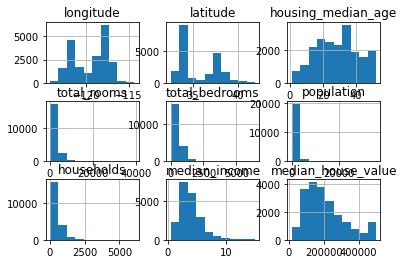

In [31]:
df.hist()
plt.show()

<AxesSubplot:>

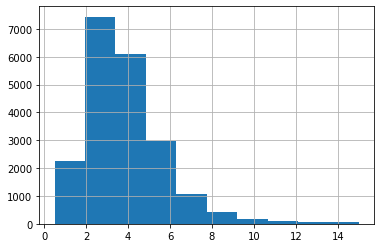

In [32]:
df['median_income'].hist()

In [33]:
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where( df['income_cat'] < 5.0, 5.0, inplace = True)

In [34]:
df['income_cat'].value_counts()/len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [35]:
rtrain, rtest = train_test_split(df, test_size = 0.2, random_state = 5)

In [36]:
rtest['income_cat'].value_counts() / len(rtest)

3.0    0.367248
2.0    0.313711
4.0    0.163275
5.0    0.115795
1.0    0.039971
Name: income_cat, dtype: float64

In [37]:
strat_train, strat_test = train_test_split(df, test_size = 0.2, random_state = 5, stratify = df['income_cat'])

In [38]:
strat_test['income_cat'].value_counts()/len(strat_test)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: income_cat, dtype: float64

In [39]:
strat_train.drop(labels= ['income_cat'], axis = 1, inplace = True)
strat_test.drop(labels= ['income_cat'], axis = 1, inplace = True)